In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Linear Function

In [3]:
# torch.nn.Linear(in_features: int, out_features: int, bias: bool = True)

In [91]:
lin_layer = nn.Linear(2, 2, bias=False)

### See the weight

In [92]:
lin_layer.weight
lin_layer.bias

Parameter containing:
tensor([[-0.6615,  0.2790],
        [-0.1878, -0.1082]], requires_grad=True)

In [93]:
lin_layer.weight.shape

torch.Size([2, 2])

### Manually set the weight

In [95]:
lin_layer.weight.data = torch.tensor([[1,2], [1, 2]])

In [96]:
lin_layer.weight

Parameter containing:
tensor([[1, 2],
        [1, 2]], requires_grad=True)

In [101]:
lin_layer.weight = nn.Parameter(torch.ones(lin_layer.weight.shape))
lin_layer.weight = nn.Parameter(torch.tensor([[1,2], [1, 2]], dtype=torch.float64))
lin_layer.weight

Parameter containing:
tensor([[1., 2.],
        [1., 2.]], dtype=torch.float64, requires_grad=True)

In [103]:
input_data = torch.tensor([[3,4], [3,4]], dtype=torch.float64)
input_data = torch.tensor([3,4], dtype=torch.float64)

output = lin_layer(input_data)
output

tensor([11., 11.], dtype=torch.float64, grad_fn=<SqueezeBackward3>)

In [27]:
class f1:
    def __init__(self, multiplier):
        self.multiplier = multiplier
    def get_multiplier_value(self):
        return self.multiplier
    
    def __call__(self, number):
        return number*self.multiplier

a= f1(3)
a.get_multiplier_value()

a(4)

12

### Perceptron

In [61]:
lin_layer = nn.Linear(2, 1, bias=False)
# manually set the weights
lin_layer.weight.data = torch.tensor([1,2])
input_data = torch.tensor([3,4])

output = lin_layer(input_data)
output

tensor(11, grad_fn=<DotBackward>)

In [72]:
### Layer form
relu = nn.ReLU()
relu(output)

relu(torch.tensor(-1))

tensor(11, grad_fn=<ReluBackward0>)

tensor(0)

In [70]:
## Function form
F.relu(torch.tensor(-3))

tensor(0)

### ReLU

In [76]:
rnn = nn.RNN(input_size=1, hidden_size=1, num_layers=1, nonlinearity='relu', bias=False)

In [83]:
input_data = torch.randn(3, 1, 1)
input_data

tensor([[[ 1.3158]],

        [[-1.0375]],

        [[-0.6630]]])

In [84]:
h_0 = torch.rand(1,1,1)
h_0

tensor([[[0.0744]]])

In [87]:
output, h_n = rnn(input_data, h_0)
output

tensor([[[0.4318]],

        [[0.0000]],

        [[0.0000]]], grad_fn=<StackBackward>)

In [88]:
h_n

tensor([[[0.]]], grad_fn=<StackBackward>)

# Handwriting

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible

In [3]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [4]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


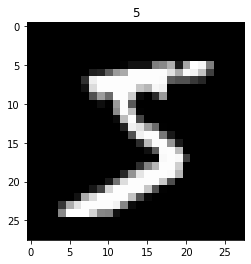

In [9]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [6]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=BATCH_SIZE, shuffle=True)

In [7]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array


/Users/ardhendusingh/Applications/anaconda3/envs/local_nmt/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/ardhendusingh/Applications/anaconda3/envs/local_nmt/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ardhendusingh/Applications/anaconda3/envs/local_nmt/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [10]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [11]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [22]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.2607 | test accuracy: 0.10
Epoch:  0 | train loss: 1.0006 | test accuracy: 0.54
Epoch:  0 | train loss: 0.8141 | test accuracy: 0.69
Epoch:  0 | train loss: 0.3652 | test accuracy: 0.80
Epoch:  0 | train loss: 0.5855 | test accuracy: 0.85
Epoch:  0 | train loss: 0.3440 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2780 | test accuracy: 0.91
Epoch:  0 | train loss: 0.4114 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1343 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2064 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0732 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1144 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2560 | test accuracy: 0.93
Epoch:  0 | train loss: 0.4530 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2869 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2835 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0994 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1060 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1261 | test accuracy

In [23]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
